Task 3.2: Simulator

a) Prove the successful entanglement of two qubits with the simulator. Also output measurement results of the two qubits on the console.

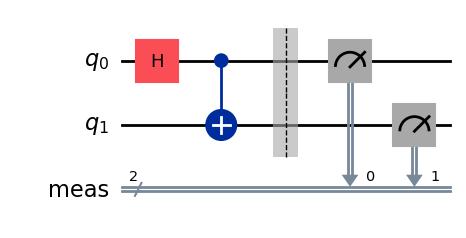

In [2]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)

qc.h(0)
qc.cx(0, 1)

qc.measure_all()

qc.draw("mpl")

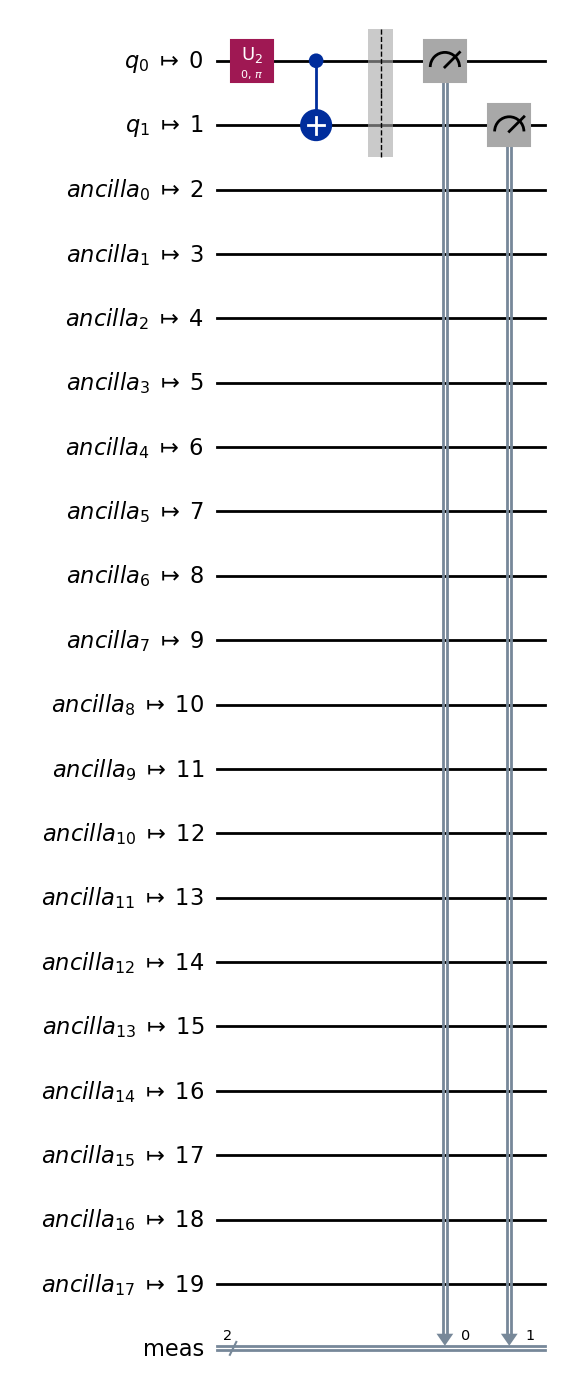

In [4]:
from qiskit import transpile
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2

backend = FakeAlmadenV2()

transpiled_circuit = transpile(qc, backend)
transpiled_circuit.draw('mpl', style="iqp")

c:\Users\noel_\anaconda3\Lib\site-packages\qiskit_ibm_runtime\fake_provider\fake_backend.py:357: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


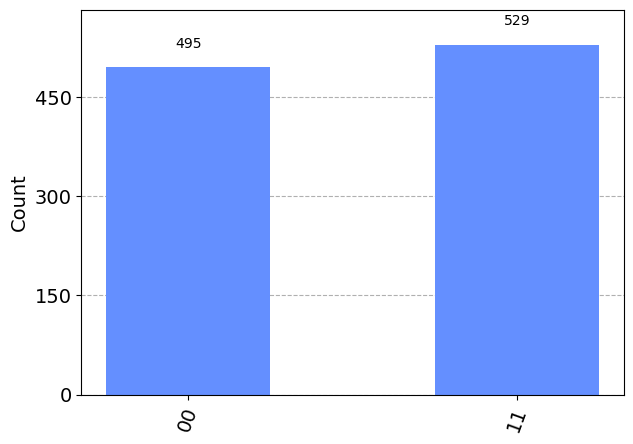

In [6]:
from qiskit.visualization import plot_histogram
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)

b) Form a circuit which changes the state |1⟩ to the state √3/2 |0⟩ + 1/2 |1⟩ is mapped. (hint: To map any unitary
matrix to Qiskit, you need the function QuantumCircuit.unitary . Assume that the unitary matrix only has
real entries).

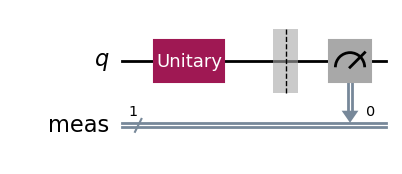

In [8]:
from qiskit import QuantumCircuit
import numpy as np

U = np.array([
    [1/2, np.sqrt(3)/2],
    [-np.sqrt(3)/2, 1/2]
])
circuit = QuantumCircuit(1)
circuit.unitary(U, [0])

circuit.measure_all()

circuit.draw("mpl")

c:\Users\noel_\anaconda3\Lib\site-packages\qiskit_ibm_runtime\fake_provider\fake_backend.py:357: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


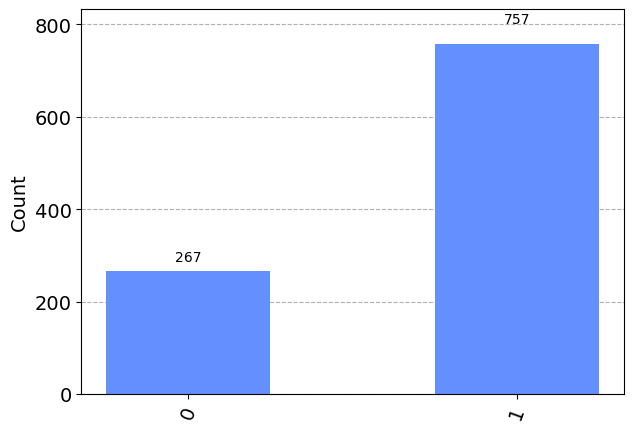

In [10]:
from qiskit import transpile
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2

backend = FakeAlmadenV2()

transpiled_circuit = transpile(circuit, backend)
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)

Task 3.3: “Real” Quantum Chip

a) Recreate the following circuit with Qiskit and execute it with a fake provider9. What do you observe?

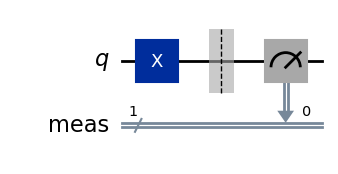

In [16]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(1)

circuit.x(0)

circuit.measure_all()

circuit.draw("mpl")

c:\Users\noel_\anaconda3\Lib\site-packages\qiskit_ibm_runtime\fake_provider\fake_backend.py:357: RuntimeWarning: Aer not found, using qiskit.BasicSimulator and no noise.
  warnings.warn(


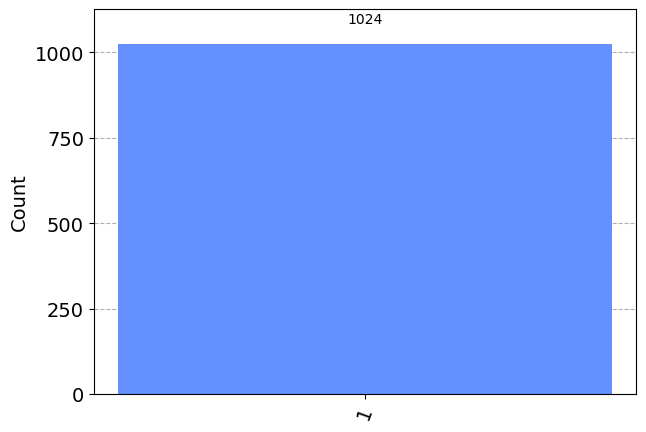

In [17]:
from qiskit import transpile
from qiskit_ibm_runtime.fake_provider import FakeAlmadenV2

backend = FakeAlmadenV2()

transpiled_circuit = transpile(circuit, backend)
job = backend.run(transpiled_circuit)
counts = job.result().get_counts()
plot_histogram(counts)

b) Entangle the qubits q[0] and q[2] and execute your circuit in the fake backend FakeQuitoV2. You can see how
the hardware coupling map looks like with the following function:
backend = FakeQuitoV2()
plot coupling map(backend.num qubits, qubit coordinates=None
coupling map=backend.coupling map.get edges())
You can display a so-called transpiled circuit with
transpiled circuit = transpile(circuit, backend)
transpiled circuit.draw(’mpl’, style="iqp")
How do you explain the difference between your original circuit and the transpiled circuit?

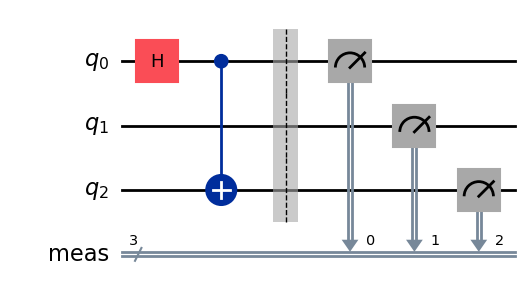

In [18]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(3)

circuit.h(0)
circuit.cx(0, 2)

circuit.measure_all()

circuit.draw("mpl")

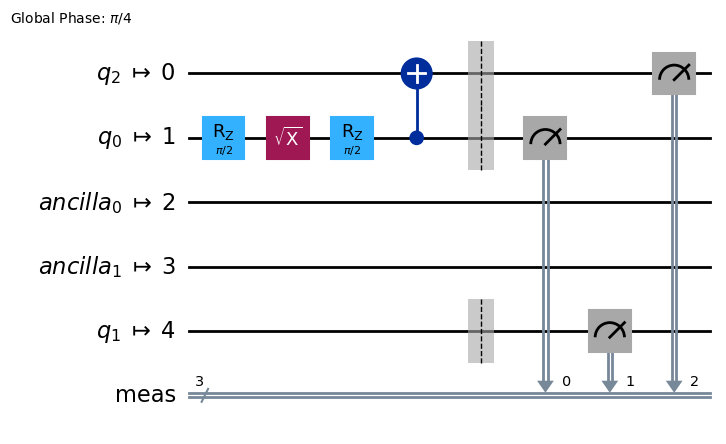

In [29]:
from qiskit.visualization import plot_coupling_map
from qiskit_ibm_runtime.fake_provider import FakeQuitoV2

backend = FakeQuitoV2()

plot_coupling_map(backend.num_qubits, qubit_coordinates=None, coupling_map=backend.coupling_map.get_edges())

transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw("mpl", style="iqp")

The difference is that it puts the 2 entangled qubits next to each other.
Also it gets transpiled to an isa circute.
FakeQuitoV2 is a fake 5 qubit backend, which is why it shows 2 "ancillas", which are helper qubits used in the circuit.

c) Now entangle the qubits q[0], q[1], and q[2]. Execute your circuit on the fake backend FakeQuitoV2 and look
at the transpiled circuit again. How do you explain the difference between your original circuit and the transpiled
circuit?

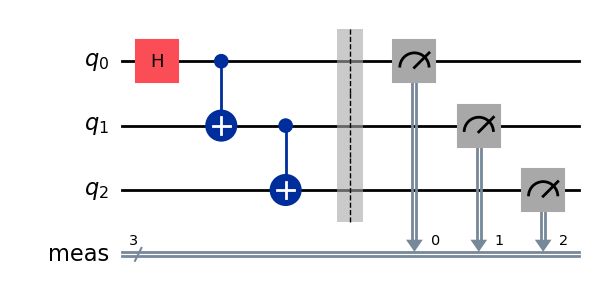

In [31]:
from qiskit import QuantumCircuit

circuit = QuantumCircuit(3)

circuit.h(0)
circuit.cx(0, 1)
circuit.cx(1, 2)

circuit.measure_all()

circuit.draw("mpl")

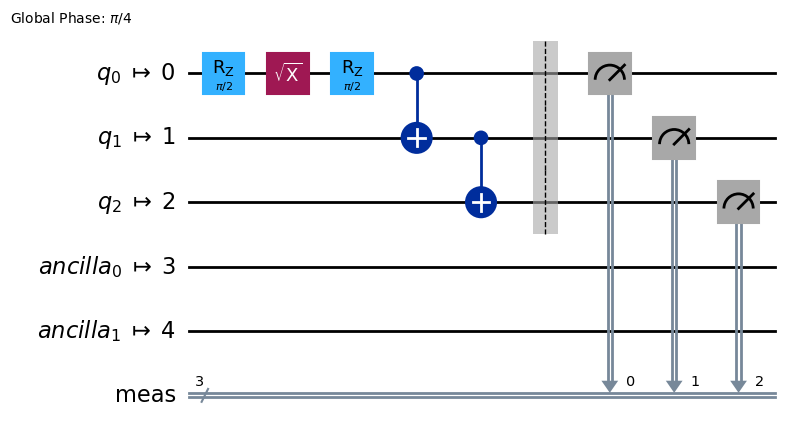

In [32]:
from qiskit.visualization import plot_coupling_map
from qiskit_ibm_runtime.fake_provider import FakeQuitoV2

backend = FakeQuitoV2()

plot_coupling_map(backend.num_qubits, qubit_coordinates=None, coupling_map=backend.coupling_map.get_edges())

transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw("mpl", style="iqp")

Now the qubits are in order since they all get entangled in order.